# Анализ спроса на самокаты

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Предобработка данных о погоде

In [153]:
# Чтение данных и удаление первой строки с единицами измерения
df = pd.read_csv('weather.csv', na_values="", parse_dates=['Datetime']).drop(index=0, axis=1)

# Названия колонок к PEP8
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Приведение колонок к float, кроме колонки с датами
for col in df.columns[1:]:
    df[col] = df[col].astype(float)

### Проверка на дубликаты

In [154]:
df.duplicated().sum(), df['datetime'].duplicated().sum()

(np.int64(0), np.int64(0))

### Работа с пропусками

In [155]:
df.isna().sum() # Проверка наличия пропусков

datetime                0
temperature            55
precipitation_total    30
wind_gust               0
wind_speed             16
cloud_cover_total      20
sunshine_duration      12
dtype: int64

Так как мы работаем с временными рядами, в заполнении пропусков может помочь **интерполяция**, которая отталкивается от значений соседних точек.

#### ДО

In [156]:
df.iloc[1003:1015]

,datetime,temperature,precipitation_total,wind_gust,wind_speed,cloud_cover_total,sunshine_duration
1004,2023-05-12 19:00:00,14.07,0.10,18.72,6.13,28.00,42.07
1005,2023-05-12 20:00:00,13.69,0.00,14.40,5.51,26.00,0.00
1006,2023-05-12 21:00:00,NaN,0.00,12.96,6.57,20.00,0.00
1007,2023-05-12 22:00:00,NaN,0.00,14.04,7.24,38.00,0.00
1008,2023-05-12 23:00:00,NaN,0.00,14.04,6.62,38.00,0.00
1009,2023-05-13 00:00:00,NaN,0.00,13.68,7.73,25.00,0.00
1010,2023-05-13 01:00:00,NaN,0.00,12.96,7.17,23.70,0.00
1011,2023-05-13 02:00:00,NaN,0.00,12.60,8.56,23.10,0.00
1012,2023-05-13 03:00:00,NaN,0.00,11.16,6.73,59.00,0.00
1013,2023-05-13 04:00:00,NaN,0.00,10.80,6.64,77.00,1.44


#### ПОСЛЕ

In [157]:
for col in df.columns[1:]:
    df[col] = df[col].interpolate()
    
df.iloc[1003:1015]

,datetime,temperature,precipitation_total,wind_gust,wind_speed,cloud_cover_total,sunshine_duration
1004,2023-05-12 19:00:00,14.07,0.10,18.72,6.13,28.00,42.07
1005,2023-05-12 20:00:00,13.69,0.00,14.40,5.51,26.00,0.00
1006,2023-05-12 21:00:00,13.49,0.00,12.96,6.57,20.00,0.00
1007,2023-05-12 22:00:00,13.29,0.00,14.04,7.24,38.00,0.00
1008,2023-05-12 23:00:00,13.08,0.00,14.04,6.62,38.00,0.00
1009,2023-05-13 00:00:00,12.88,0.00,13.68,7.73,25.00,0.00
1010,2023-05-13 01:00:00,12.68,0.00,12.96,7.17,23.70,0.00
1011,2023-05-13 02:00:00,12.48,0.00,12.60,8.56,23.10,0.00
1012,2023-05-13 03:00:00,12.27,0.00,11.16,6.73,59.00,0.00
1013,2023-05-13 04:00:00,12.07,0.00,10.80,6.64,77.00,1.44


### Работа со значениями

In [158]:
# Перевод порыва и скорости ветра в м/с и округление до 1 знака после запятой
df[['wind_gust', 'wind_speed']] = (df[['wind_gust', 'wind_speed']] / 3.6).round(1)

# Округление продолжительности солнечного сияния, температуры и облачности до целого
df[['sunshine_duration', 'temperature', 'cloud_cover_total']] = df[['sunshine_duration', 'temperature', 'cloud_cover_total']].round().astype(int)

df.iloc[1234:1240]

,datetime,temperature,precipitation_total,wind_gust,wind_speed,cloud_cover_total,sunshine_duration
1235,2023-05-22 10:00:00,23,0.00,4.60,0.90,8,55
1236,2023-05-22 11:00:00,24,0.00,5.10,1.10,4,58
1237,2023-05-22 12:00:00,25,0.00,5.00,1.40,4,58
1238,2023-05-22 13:00:00,25,0.10,5.00,1.90,9,55
1239,2023-05-22 14:00:00,26,0.60,6.00,1.00,18,49
1240,2023-05-22 15:00:00,25,0.50,6.40,1.10,19,48


### Проверка на выбросы

In [159]:
df.describe()

,datetime,temperature,precipitation_total,wind_gust,wind_speed,cloud_cover_total,sunshine_duration
count,3672,3672.00,3672.00,3672.00,3672.00,3672.00,3672.00
mean,2023-06-16 11:30:00.000000256,18.09,0.10,5.80,2.04,40.98,21.54
min,2023-04-01 00:00:00,-2.00,0.00,0.80,0.00,0.00,0.00
25%,2023-05-09 05:45:00,13.00,0.00,3.70,1.20,15.00,0.00
50%,2023-06-16 11:30:00,18.00,0.00,5.10,1.70,32.00,15.00
75%,2023-07-24 17:15:00,23.00,0.00,7.30,2.60,67.00,43.00
max,2023-08-31 23:00:00,36.00,5.80,19.80,8.30,100.00,60.00
std,NaN,6.84,0.34,2.90,1.18,31.31,21.89


Все значения находятся в норме, выбросов не наблюдается

### Выгрузка новой таблицы

In [160]:
new_units_of_measure = ["", "°C", "mm", "m/s", "m/s", "%", "min"] # Скорости теперь в м / с

first_row = pd.DataFrame([new_units_of_measure], columns=df.columns, index=[0]) 
df = pd.concat([first_row, df], ignore_index=True) # Добавление в начало таблицы


df.to_csv('processed_weather.csv', index=False)

## Предобработка данных о поездках

In [65]:
# Чтение данных и удаление первой строки с единицами измерения
df = pd.read_csv('rides.csv', na_values="", parse_dates=['Start Date', 'End Date'])

# Названия колонок к PEP8
df.columns = df.columns.str.replace(' ', '_').str.lower()
    
# Приводим значения направлений движения к единому формату
df['end_district'] = df['end_district'].str.lower().str.strip().str.replace(" ", '-')
df['start_district'] = df['start_district'].str.lower().str.strip().str.replace(" ", '-')

# Приводим значения начальных и конечных точек к единому формату
df['start_location'] = df['start_location'].str.lower().str.strip().str.replace(".", ' ').str.replace("  ", ' ')
df['start_location'] = df['start_location'].str.replace('ул ', '')

df['end_location'] = df['end_location'].str.lower().str.strip().str.replace(".", ' ').str.replace("  ", ' ')
df['end_location'] = df['end_location'].str.replace('ул ', '')

### Проверка на дубликаты

In [69]:
df.duplicated().sum()

np.int64(0)

Данные, представленные в таблице rides.csv не должны дублироваться, поэтому удаляем дубликаты

In [68]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

### Работа с пропусками

In [70]:
df.isna().sum() # Проверка наличия пропусков

id                   0
start_date           0
end_date           555
start_location       0
start_district       0
end_location         0
end_district         0
distance          1181
promo                0
dtype: int64

Наблюдаются пропуски с дате окончания поездки и дистанции поездки.

* Пропуски в end_date будем заполнять на основании пройденной дистанции

* Пропуски в distance будем заполнять на основании времени поездки

#### Работа с пропусками в end_date

Рассчитывать время конца поездки будем на основании медианы средней скорости во время пути и дистанции поездки.

Формула: Конец_поездки = начало_поездки + (дистанция / медиана_средней_скорости)

##### ДО

In [71]:
df.iloc[946:949]

,id,start_date,end_date,start_location,start_district,end_location,end_district,distance,promo
946,101286,2023-04-22 23:33:50,NaT,чехова,заречный,октябрьская,заречный,2521.0,0
947,101287,2023-04-22 23:35:04,2023-04-22 23:54:26,советская,центральный,суворова,ленинский,3204.0,0
948,101288,2023-04-22 23:36:43,2023-04-23 00:14:03,кирова,ленинский,буденного,октябрьский,3755.0,0


##### ПОСЛЕ

In [72]:
# Создаем колонну ride_duration, которая содержит длительность поездки в минутах
df['ride_duration'] = df.apply(lambda row: (row.end_date - row.start_date).seconds / 60, axis = 1)

# Создаем колонку average_speed, которая хранит среднюю скорость на протяжении всего пути в км/ч
df['average_speed'] = df.apply(lambda row: (row.distance / 1000) / (row.ride_duration / 60), axis=1)

median_average_speed = df['average_speed'].median()

# Заполнение пустых значений в столбце 'end_date'
df['end_date'] = df['end_date'].fillna(
    df['start_date'] + pd.to_timedelta((df['distance'] / 1000) / median_average_speed, unit='h')
)

df.iloc[946:949]

,id,start_date,end_date,start_location,start_district,end_location,end_district,distance,promo,ride_duration,average_speed
946,101286,2023-04-22 23:33:50,2023-04-22 23:50:25.672184098,чехова,заречный,октябрьская,заречный,2521.0,0,NaN,NaN
947,101287,2023-04-22 23:35:04,2023-04-22 23:54:26.000000000,советская,центральный,суворова,ленинский,3204.0,0,19.366667,9.926334
948,101288,2023-04-22 23:36:43,2023-04-23 00:14:03.000000000,кирова,ленинский,буденного,октябрьский,3755.0,0,37.333333,6.034821


#### Работа с пропусками в distance

Рассчитывать дистанцию поездки будем на основании медианы средней скорости во время пути и длительности поездки.

Формула: Дистанция = медиана_средней_скорости * время_поездки

##### ДО

In [73]:
df.iloc[1130:1133]

,id,start_date,end_date,start_location,start_district,end_location,end_district,distance,promo,ride_duration,average_speed
1130,101470,2023-04-23 11:26:28,2023-04-23 12:10:50,речная,юго-восточный,пионерская,заречный,NaN,0,44.366667,NaN
1131,101471,2023-04-23 11:27:21,2023-04-23 11:47:01,комарова,ленинский,дружбы,центральный,3581.0,0,19.666667,10.925085
1132,101472,2023-04-23 11:28:32,2023-04-23 11:50:19,майская,октябрьский,молодежная,юго-восточный,3082.0,0,21.783333,8.489059


##### ПОСЛЕ

In [74]:
# Заполнение пустых значений в столбце 'distance'
df['distance'] = df['distance'].fillna(median_average_speed * (df['ride_duration'] / 60) * 1000)

df.iloc[1130:1133]

,id,start_date,end_date,start_location,start_district,end_location,end_district,distance,promo,ride_duration,average_speed
1130,101470,2023-04-23 11:26:28,2023-04-23 12:10:50,речная,юго-восточный,пионерская,заречный,6740.07179,0,44.366667,NaN
1131,101471,2023-04-23 11:27:21,2023-04-23 11:47:01,комарова,ленинский,дружбы,центральный,3581.00000,0,19.666667,10.925085
1132,101472,2023-04-23 11:28:32,2023-04-23 11:50:19,майская,октябрьский,молодежная,юго-восточный,3082.00000,0,21.783333,8.489059


#### Проверка работы

In [75]:
df = df.drop(['ride_duration', 'average_speed'], axis=1) # Удаляем уже ненужные стоблцы

df.isna().sum() # Проверка наличия пропусков

id                0
start_date        0
end_date          0
start_location    0
start_district    0
end_location      0
end_district      0
distance          0
promo             0
dtype: int64

### Проверка на выбросы

In [76]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,id,start_date,end_date,distance,promo
count,97372.00,97372,97372,97372.00,97372.00
mean,149025.50,2023-06-13 21:06:08.931407360,2023-06-13 21:33:03.576468480,26998.68,0.02
min,100340.00,2023-04-22 09:01:03,2023-04-22 09:24:45,1.00,0.00
25%,124682.75,2023-05-20 21:41:39.500000,2023-05-20 22:07:59,3044.00,0.00
50%,149025.50,2023-06-14 15:15:46,2023-06-14 15:44:53,3703.00,0.00
75%,173368.25,2023-07-08 19:50:22.249999872,2023-07-08 20:18:30,4433.00,0.00
max,197711.00,2023-07-31 23:57:01,2023-08-14 07:25:37.719536260,7569789.00,1.00
std,28109.02,NaN,NaN,307435.12,0.14


В distance присутствуют очень сильные выбросы, вероятно, они вызваны ошибками в показаниях датчиков

Так как выбросы в distance аномально большие или маленькие, то самым простым способом будет вручную отфильтровать выбросы и исправить ошибочные значения, не прибегая к интерквартильному размаху или стандартным отклонениям

Выбросы будем исправлять по аналогии с пропусками.

Некоторые строки с выбросами также содержали пустые данные и на этапе заполнения пустых данных, заполненные пропуски тоже получили некорректные значения. При условии, что один из параметров выброс, а другой был пропущен - мы не можем восстановить данные, следовательно придется их удалить.

In [77]:
# Обновляем значения в колонке ride_duration
df['ride_duration'] = df.apply(lambda row: (row.end_date - row.start_date).seconds / 60, axis=1)

# Удаляем значения, которые невозможно восстановить и обновляем индексацию
df = df[(df['ride_duration'] < 90) & (df['ride_duration'] > 10)]
df = df.reset_index(drop=True)

##### ДО

In [78]:
df.iloc[954:957]

,id,start_date,end_date,start_location,start_district,end_location,end_district,distance,promo,ride_duration
954,101299,2023-04-22 23:54:39,2023-04-23 00:23:58,дачная,центральный,свободы,ленинский,4273850.00,0,29.32
955,101300,2023-04-22 23:58:02,2023-04-23 00:20:51,заречная,юго-восточный,спортивная,октябрьский,3186.00,0,22.82
956,101301,2023-04-22 23:58:44,2023-04-23 00:22:00,подгорная,ленинский,озерная,юго-восточный,4679.00,0,23.27


##### ПОСЛЕ

In [79]:
# Заменяем выбросы в соответствии с формулой
df['distance'] = df['distance'].where(
    (df['distance'] >= 10) & (df['distance'] <= 50000), 
    median_average_speed * (df['ride_duration'] / 60) * 1000
).round().astype(int)

df.iloc[954:957]

,id,start_date,end_date,start_location,start_district,end_location,end_district,distance,promo,ride_duration
954,101299,2023-04-22 23:54:39,2023-04-23 00:23:58,дачная,центральный,свободы,ленинский,4454,0,29.32
955,101300,2023-04-22 23:58:02,2023-04-23 00:20:51,заречная,юго-восточный,спортивная,октябрьский,3186,0,22.82
956,101301,2023-04-22 23:58:44,2023-04-23 00:22:00,подгорная,ленинский,озерная,юго-восточный,4679,0,23.27


#### Проверка работы

In [80]:
# Удаляем теперь ненужные колонны таблицы
df = df.drop(['ride_duration'], axis=1) 

df.describe()

,id,start_date,end_date,distance,promo
count,96638.00,96638,96638,96638.00,96638.00
mean,149020.97,2023-06-13 20:58:56.413264128,2023-06-13 21:25:26.435115264,3845.82,0.02
min,100340.00,2023-04-22 09:01:03,2023-04-22 09:24:45,1094.00,0.00
25%,124672.25,2023-05-20 21:32:31.750000128,2023-05-20 21:58:06,3119.00,0.00
50%,149018.50,2023-06-14 15:08:45,2023-06-14 15:37:43.500000,3743.00,0.00
75%,173376.75,2023-07-08 19:55:47.500000,2023-07-08 20:21:19.500000,4456.00,0.00
max,197711.00,2023-07-31 23:57:01,2023-08-01 00:42:12,12675.00,1.00
std,28113.79,NaN,NaN,1036.42,0.14


### Выгрузка новой таблицы

In [81]:
# Приводим дистанцию к целочисленному типу
df['distance'] = df['distance'].astype(int)

df.to_csv('processed_rides.csv', index=False, date_format='%Y-%m-%d %H:%M:%S')

## Объединение таблиц

Для более удобного анализа данных стоит объединить имеющиеся таблицы

In [82]:
rides_df = pd.read_csv('processed_rides.csv', parse_dates=['start_date', 'end_date'])
weather_df = pd.read_csv('processed_weather.csv', parse_dates=['datetime']).drop(index=0, axis=1)

rides_df['rounded_start_time'] = rides_df['start_date'].dt.round('h')


merge_df = pd.merge_asof(
    rides_df.sort_values('rounded_start_time'), 
    weather_df.sort_values('datetime'), 
    left_on='rounded_start_time', 
    right_on='datetime', 
    direction='backward'
)

merge_df = merge_df.drop('rounded_start_time', axis=1)

merge_df.to_csv('rides_&_weather.csv', index=False)

## Проведение расчетов и исследований

### 1. Расчет итоговой стоимости

![alt text](image.png)

In [ ]:
# тык-тык тут код

### 2. Стимулирует ли акция спрос на самокаты?

. . .

### 3. Исследование корреляцию между параметрами погодных условий

#### Первичный анализ

Перед началом исследования стоит понять как распределены данные, чтобы выбрать правильный коэффицент. Будем использовать тест Шапиро-Уилка и графический анализ.

temperature  -  0.0
precipitation_total  -  0.0
wind_gust  -  0.0
wind_speed  -  0.0
cloud_cover_total  -  0.0
sunshine_duration  -  0.0


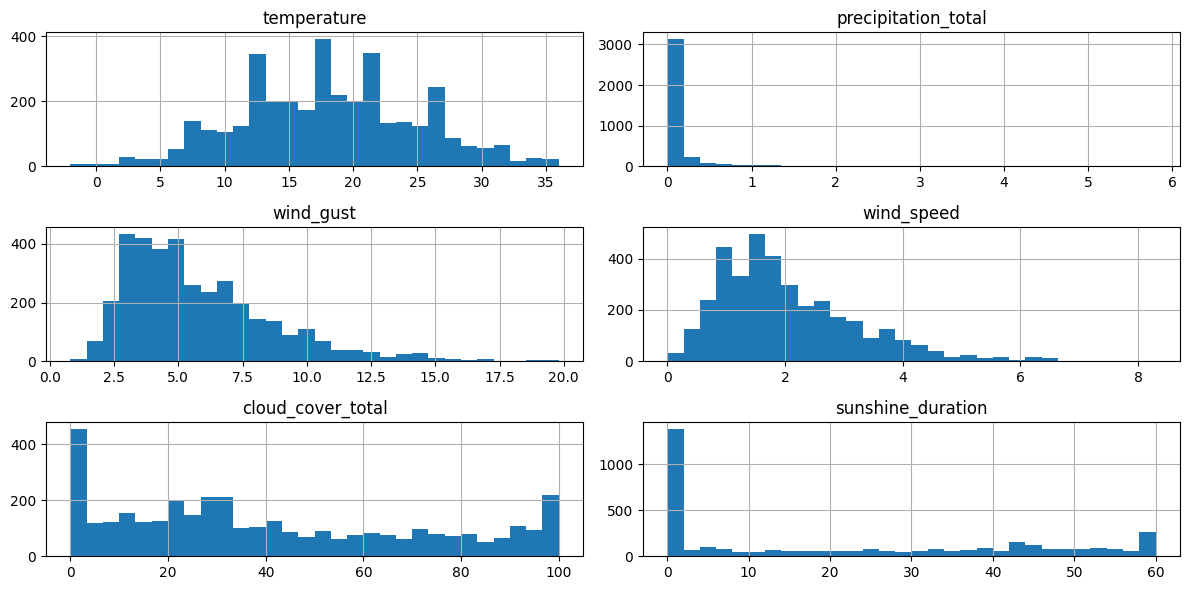

In [16]:
from scipy.stats import shapiro

df = pd.read_csv('processed_weather.csv', parse_dates=['datetime']).drop(index=0, axis=1)

# Приведение колонок к float, кроме колонки с датами
for col in df.columns[1:]:
    df[col] = df[col].astype(float)

# Проверяем данные через тест Шапиро-Уилка
for col in df.columns[1:]:
    stat, p_value = shapiro(df[col])  
    print(col, ' - ', p_value.round(5))

# Строим график
df.drop('datetime', axis=1).hist(bins=30, figsize=(12, 6))
plt.tight_layout()
plt.show()

По данным из теста Шапиро-Уилка и из графиков можно сделать вывод, что все данные распределены ненормально, следовательно, так как все данные количественные, то будет использовать коэффицент Спирмена для поиска корреляций. 

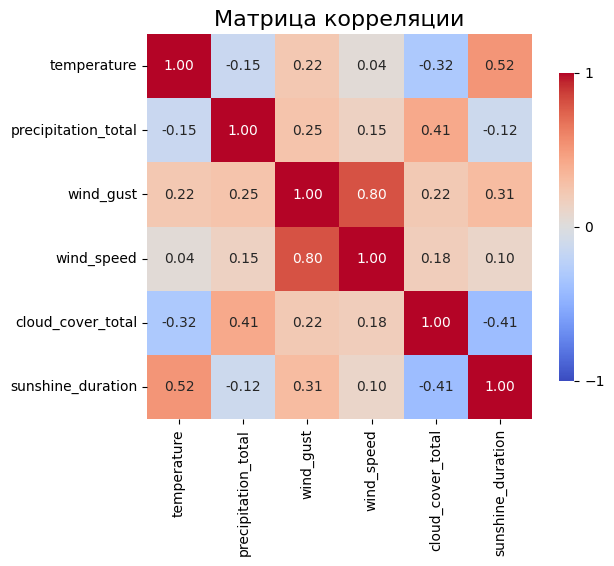

In [17]:
# Так как в исследледовании мы исследуем только параметры погодных условий, то удаляем datetime
df = df.drop('datetime', axis=1)

# Строим матрицу корреляций
corr_df = df.corr(method='spearman')

# Настройка графика
plt.figure(figsize=(7, 5))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8, "ticks": [-1, 0, 1]}, vmin=-1, vmax=1)
plt.title('Матрица корреляции', fontsize=16)
plt.show()

Исследуем данные, где корреляционное значение больше 0.3 или меньше < -0.3, то есть данные, как минимум с умеренной корреляцией.

Нам подходят следующие корреляции:

* Умеренные
    1. Облачность и температура (Обратная зависимость)
    2. Облачность и общее количество осадков
    3. Порывы ветра и продолжительность солнечного сияния 
    4. Продолжительность солнечного сияния и облачность (Обратная зависимость)
* Заметная
    1. Продолжительность солнечного сияния и температура
* Высокая
    1. Скорость ветра и порывы ветра

#### Умеренные

##### 1. Облачность и температура

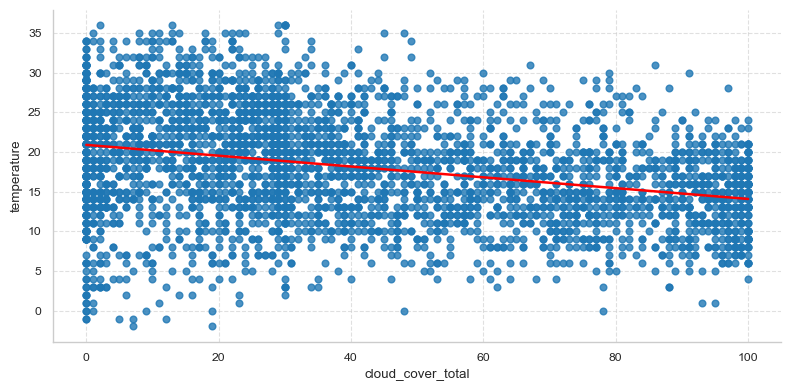

In [131]:
sns.set_context("paper")
sns.lmplot(x="cloud_cover_total", y="temperature", data=df, ci=None, aspect=2, height=4, line_kws={'color': 'red'})
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Судя по значению корреляции и графическому анализу, наблюдается слабая умеренная обратная корреляция между факторами. Её легко объяснить. Когда на небе много облаков, то лучи солнца хуже доходят до земли и нагревают её, следовательно температура падает.

То есть можно сделать вывод, что облачность выступает как ограничивающий фактор для связи между продолжительностью солнечного сияния и температурой, смягчая их влияние. При высокой облачности воздействие солнечного сияния на температуру становится менее выраженным, но корреляция между солнечным сиянием и температурой остается значимой.

##### 2. Облачность и общее количество осадков

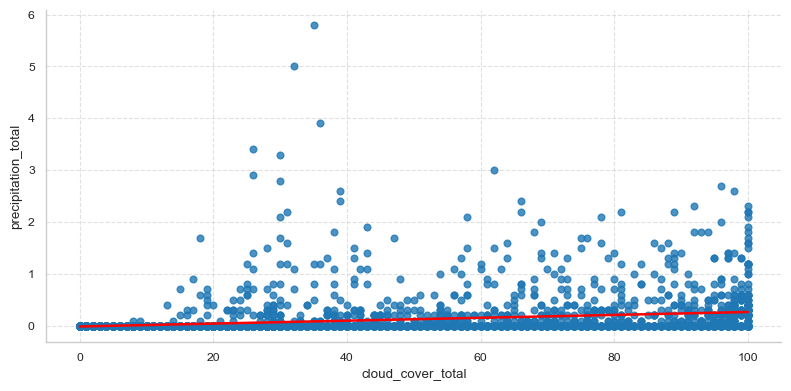

In [134]:
sns.set_context("paper")
sns.lmplot(x="cloud_cover_total", y="precipitation_total", data=df, ci=None, aspect=2, height=4, line_kws={'color': 'red'})
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Судя по значению корреляции и графическому анализу, наблюдается умеренная корреляция между факторами. Её легко объяснить. Когда на небе много облаков, то, вероятно и погода хуже, а следовательно вероятность дождя выше.

То есть можно сделать вывод, что облачность выступает как основной фактор, влияющий на количество осадков.

##### 3. Порывы ветра и продолжительность солнечного сияния 

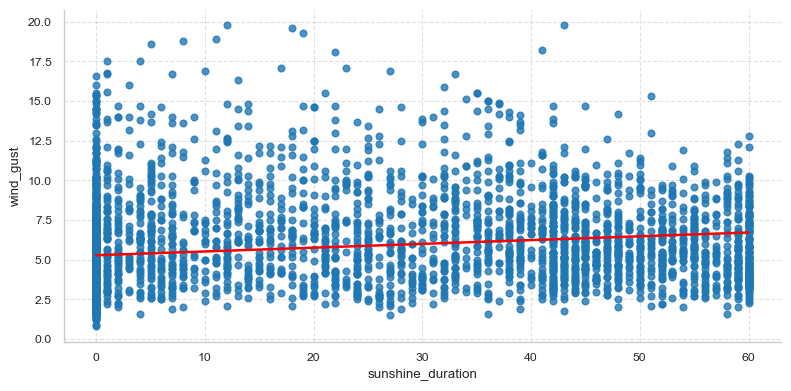

In [144]:
sns.set_context("paper")
sns.lmplot(x="sunshine_duration", y="wind_gust", data=df, ci=None, aspect=2, height=4, line_kws={'color': 'red'})
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Судя по значению корреляции и графическому анализу, наблюдается слабая умеренная корреляция между факторами. Её так легко объяснить. Вероятно, при появлении воздушных масс, блокирующих солнечные лучи, порывы ветра их сгоняют.

То есть можно сделать вывод, что связь между этими факторами является особенностью представленных данных и выступает как бы случайным "шумом".

##### 4. Продолжительность солнечного сияния и облачность 

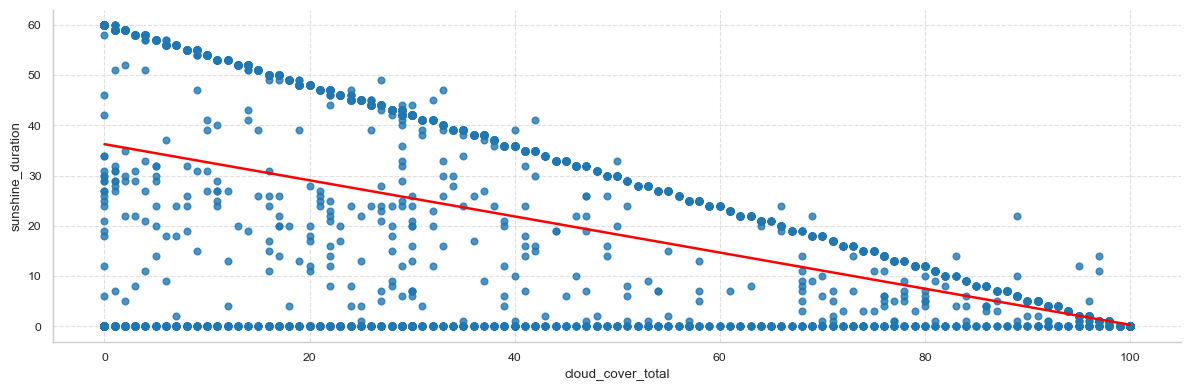

In [143]:
sns.set_context("paper")
sns.lmplot(x="cloud_cover_total", y="sunshine_duration", data=df, ci=None, aspect=3, height=4, line_kws={'color': 'red'})
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Судя по значению корреляции и графическому анализу, наблюдается умеренная обратная корреляция между факторами. Её легко можно объяснить. Когда на небе много облаков, то лучи солнца хуже доходят до земли.

То есть можно сделать вывод, что облачность выступает как основной фактор от которого зависит продолжительность солнечного сияния. Данный вывод подкрепляет вывод из первого пункта(1. Облачность и температрура).

#### Заметные

##### 1. Продолжительность солнечного сияния и температура

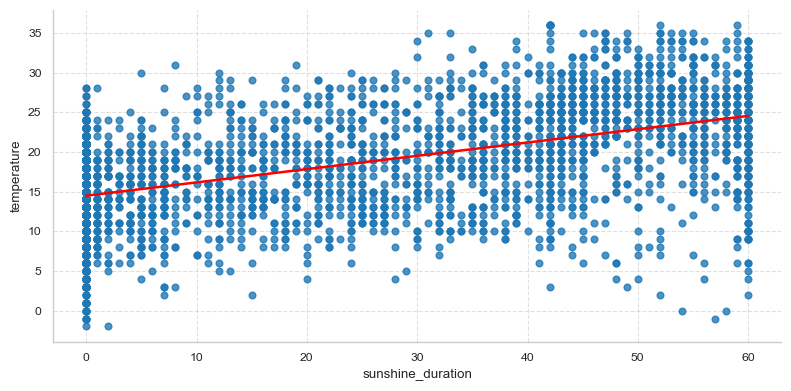

In [149]:
sns.set_context("paper")
sns.lmplot(x="sunshine_duration", y="temperature", data=df, ci=None, aspect=2, height=4, line_kws={'color': 'red'})
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Судя по значению корреляции и графическому анализу, наблюдается заметная корреляция между факторами. Её легко можно объяснить. Чем дольше солнце светит и ему ничего не мешает, то тем сильнее нагревается Земля и растет температура.

То есть можно сделать вывод, что продолжительность солнечного сияния выступает как основной фактор от которого зависит температура.

#### Высокие

##### 1. Скорость ветра и порывы ветра

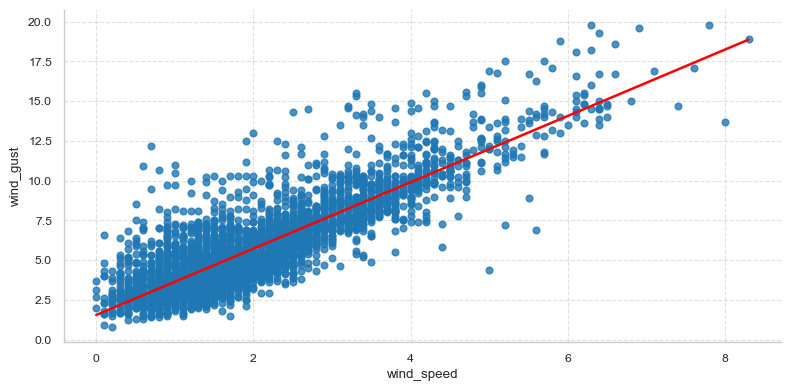

In [ ]:
sns.set_context("paper")
sns.lmplot(x="wind_speed", y="wind_gust", data=df, ci=None, aspect=2, height=4, line_kws={'color': 'red'})
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Судя по значению корреляции и графическому анализу, наблюдается высокая корреляция между факторами. Её легко можно объяснить. Чем выше скорость ветка, тем соответственно и ветреннее погода, следовательно и больше скорость порывов ветра.

То есть можно сделать вывод, что скорость ветра выступает как основной фактор от которого зависит скорость порывов ветра.

#### Вывод

На основе проведенного исследования можно сделать следующие выводы:

- Температура в первую очередь зависит от продолжительность солнечного сияния. Но так же от облачности, которая выступает как ограничивающий фактор для связи между.
- Общее количество осадков зависит больше всего от облачности.
- Скорость порывов ветра почти полностью зависят от скорости ветра.

## Проверка гипотез

### 1. В дождливое время спрос на самокаты ниже?

H0: Спрос на самокаты <u>не зависит</u> от погодных условий

H1: Спрос на самокаты <u>зависит</u> от погодных условий

#### Подготовка данных

In [79]:
df = pd.read_csv('rides_&_weather.csv', parse_dates=['start_date', 'end_date', 'datetime'])
weather_df = pd.read_csv('processed_weather.csv', parse_dates=['datetime']).drop(index=0, axis=1)

# Устанавливаем datetime как индекс
df.set_index('datetime', inplace=True)

# Ресемплируем данные по часам и считаем количество поездок
counted_rides_df = df.resample('H').size().reset_index(name='rides')

# Мержим таблицу погоды и трафика по часам
rides_df = pd.merge_asof(
    weather_df, 
    counted_rides_df, 
    left_on='datetime', 
    right_on='datetime',
    direction='backward'
)

rides_df = rides_df.dropna()
rides_df.head(3)

,datetime,temperature,precipitation_total,wind_gust,wind_speed,cloud_cover_total,sunshine_duration,rides
513,2023-04-22 09:00:00,14,0.0,5.6,1.7,71,17,10.0
514,2023-04-22 10:00:00,16,0.0,6.5,1.6,88,7,29.0
515,2023-04-22 11:00:00,17,0.1,11.6,2.4,94,3,38.0


#### Расчёты

Из исследования 3(Исследование корреляцию между параметрами погодных условий) известно, что все данные о погоде распределены ненормально, следовательно при расчёте коэффицента корреляции будем использовать коэффицент корреляции Пирсона.

Сначала проверим влият ли количество осадков на спрос

In [ ]:
from scipy.stats import spearmanr

# Приводим значения в таблице к числовому формату
for col in rides_df.columns[1:]:
    rides_df[col] = rides_df[col].astype(float)

# Высчитываем значение корреляции
k, p_value = spearmanr(rides_df['precipitation_total'], rides_df['rides'])

print(k, p_value)



0.01368194563212009 0.44205649496535226


Теперь проверим влият ли хотя бы какое-то начилие осадков на спрос

In [ ]:
# Переводим значения столбца в бинарный формат
rides_df['precipitation_total'] = rides_df['precipitation_total'].apply(lambda row: 1 if row > 0 else 0)

# Высчитываем значение корреляции
k, p_value = spearmanr(rides_df['precipitation_total'], rides_df['rides'])

print(k, p_value)

0.012551862582103923 0.4806697374021698


#### Вывод

В обоих расчётах значение коэффицента корреляции были близкими к нулю, а p-value были очень далеке от значения < 0.05. Поэтому мы отвергает H1 и принимаем H0. То есть погода не имеет никакого влияния на спрос на самокаты.

### 2. Отличается ли средняя стоимость поездки по районам?

H0: Средняя стоимость <u>не зависит</u> от района

H1: Средняя стоимость <u>зависит</u> от района

#### Подготовка данных

При расчёте итоговой стоимости будем считать, что 1 минута поездки стоит 1 рубль

In [4]:
df = pd.read_csv('processed_rides.csv', parse_dates=['start_date', 'end_date'])

df['price'] = df.apply(lambda row: 30 + ((row.end_date - row.start_date).seconds / 60) 
                       if row.promo == 1 
                       else ((row.end_date - row.start_date).seconds / 60),
                       axis=1)

#### Расчёты

Сначала через тест Шапиро-Уилка проверим данные на нормальность

In [5]:
from scipy.stats import shapiro

k, p_value = shapiro(df['price'])
print(p_value.round(11))

0.0


Так как p-value < 0.05, то данные распределны ненормально и при расчёте корреляции мы будем использовать критерий Краскера-Уолса, так как групп у нас гораздо больше двух

In [6]:
from scipy.stats import kruskal

# Группируем по начальной и конечной локации
start_location_groups = df.groupby('start_location')['price'].apply(list)
end_location_groups = df.groupby('end_location')['price'].apply(list)

# Применяем критерий Краскера-Уолса
_, p_value_start = kruskal(*start_location_groups)
_, p_value_end = kruskal(*end_location_groups)

# Интерпретация результата
print(p_value_start < 0.05, p_value_end < 0.05)


True True


Дополнительно проведём графический анализ

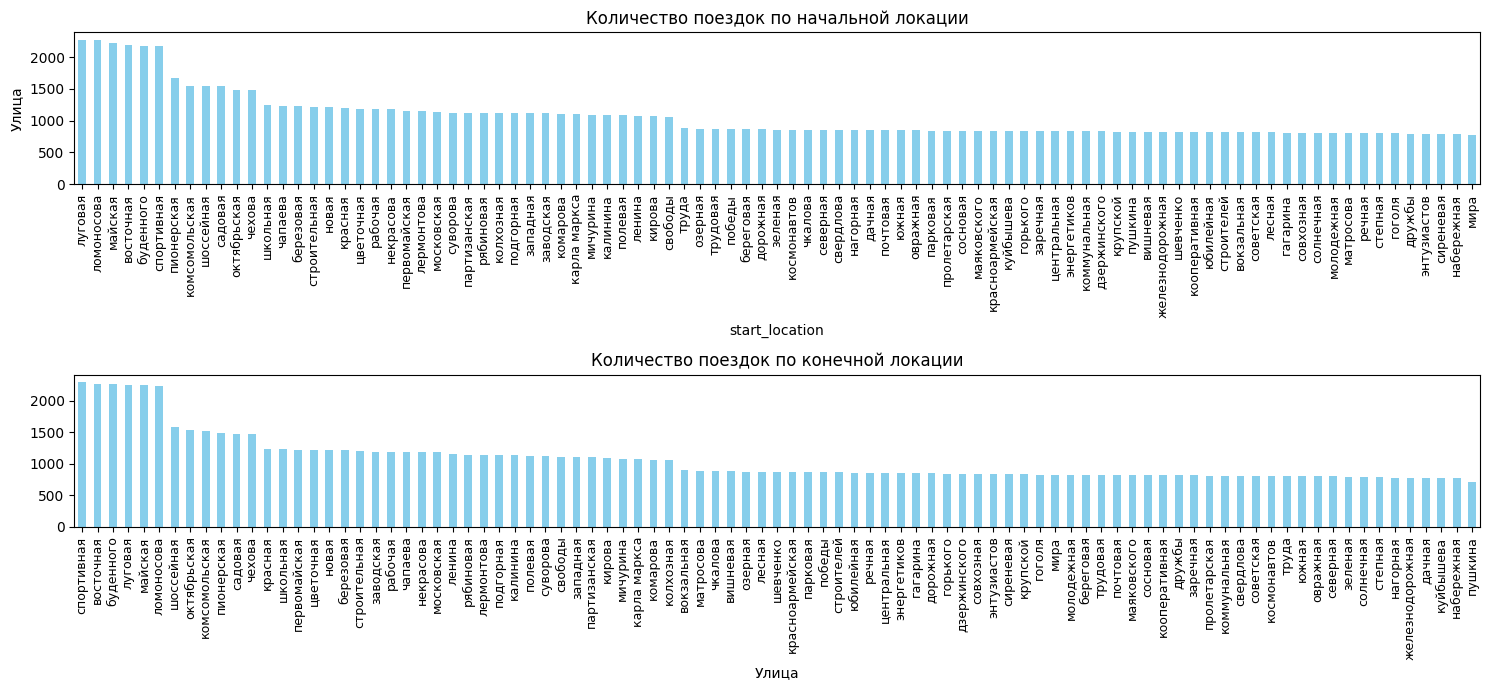

In [7]:
# Подсчет количества поездок по начальным и конечным локациям
rides_per_start = df['start_location'].value_counts()
rides_per_end = df['end_location'].value_counts()

# Построение графиков
fig, axes = plt.subplots(2, 1, figsize=(15, 7))

rides_per_start.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Количество поездок по начальной локации')
axes[0].set_ylabel('Улица')
axes[0].tick_params(axis='x', labelsize=9)

rides_per_end.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Количество поездок по конечной локации')
axes[1].set_xlabel('Улица')
axes[1].tick_params(axis='x', labelsize=9)

# Отображение графиков
plt.tight_layout()
plt.show()


Оба значения p-value оказались меньше 0.05. А также судя по графическому анализу спрос действительно зависит от начальной и конечной точки. Это говорит о том, что средняя стоимость поезки зависит от района, где была начала и закончена поездка, то есть H0 отвергается и принимается альтернативная гипотеза.

#### Вывод

Средняя стоимость <u>зависит</u> от района

### 3. Спрос на самокаты меняется в зависимости от дня недели?

H0: Спрос на самокаты <u>не зависит</u> от дня недели

H1: Спрос на самокаты <u>зависит</u> от дня условий

#### Подготовка данных

In [12]:
df = pd.read_csv('processed_rides.csv', parse_dates=['start_date', 'end_date'])

# Добавление столбца с днем недели
df['day'] = df['start_date'].dt.day_name()

# Подсчет количества поездок по дням недели
rides_per_day = df['day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Группировка данных по дням недели и получение самих значений
grouped_data = [df[df['day'] == day]['id'].values for day in rides_per_day.index]

#### Расчёты

Сначала проведём графический анализ

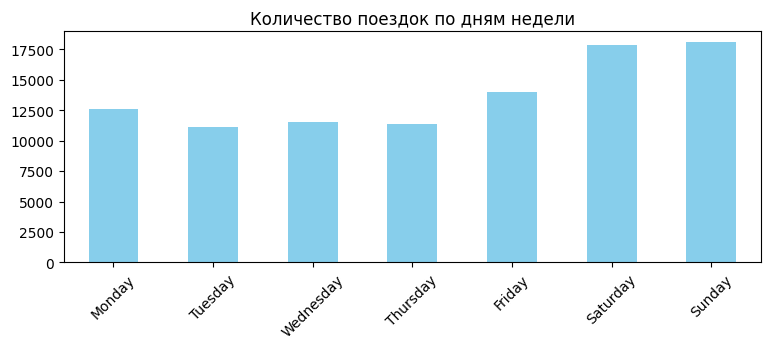

In [9]:
import matplotlib.pyplot as plt

# Визуализация
plt.figure(figsize=(9, 3))
rides_per_day.plot(kind='bar', color='skyblue')
plt.title('Количество поездок по дням недели')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()


Проверим данные на нормальность

In [10]:
from scipy.stats import shapiro

results = {day: shapiro(data) for day, data in zip(rides_per_day.index, grouped_data)}

# Вывод результатов теста на нормальность
for day, (stat, p) in results.items():
    print(f"{day}, {p < 0.05}")

Monday, True
Tuesday, True
Wednesday, True
Thursday, True
Friday, True
Saturday, True
Sunday, True


Можно сделать вывод, что все данные распределны ненормально, следовательно мы будем использовать критерий Краскера-Уолса

In [16]:
from scipy.stats import kruskal

# Проведение теста Краскала-Уоллиса
_, p_value = kruskal(*grouped_data)

print(p_value.round(20))

0.0


Судя по p-value, существует сильная зависимость между днём недели и спросом на самокаты. 

#### Вывод

Исходя из графического и анатитического анализа, получается, что зависимость существует и мы отвергает H0. То есть спрос на самокаты <u>зависит</u> от дня условий. Также стоит сказать, что самый сильный спрос по выходным, а самый низкий с понедельника по среду.